In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1) Binary Classification with Keras

In [5]:
banknotes = pd.read_csv('Datasets/banknotes.csv')
banknotes.head()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [19]:
from sklearn.model_selection import train_test_split

X = banknotes.drop(['class'], axis=1).values
y = banknotes['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

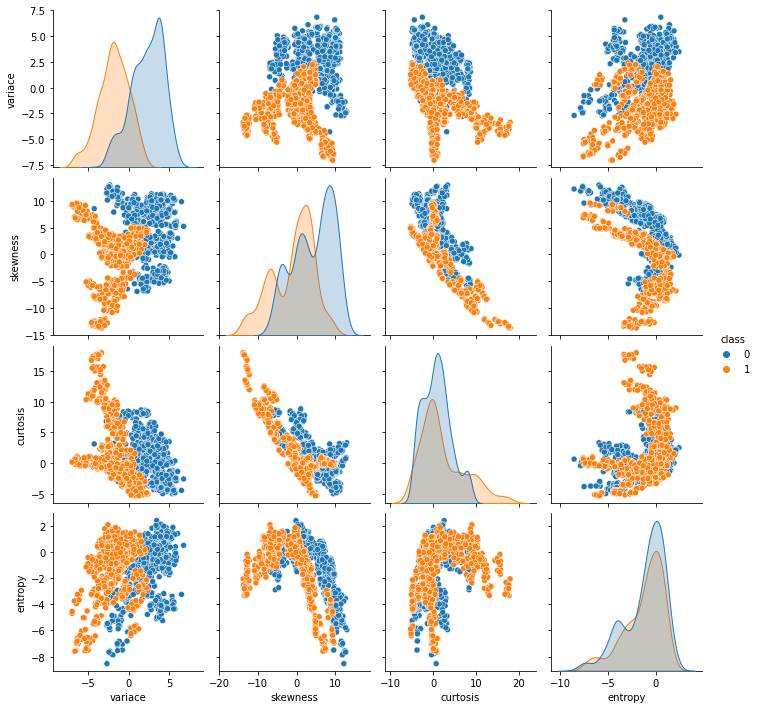

Dataset stats: 
            variace     skewness     curtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variace   1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4  

In [7]:
# Use pairplot and set the hue to be our class column
sns.pairplot(banknotes, hue='class') 

# Show the plot
plt.show()

# Describe the data
print('Dataset stats: \n', banknotes.describe())

# info of the data
print('Dataset stats: \n', banknotes.info())

# Count the number of observations per class
print('Observations per class: \n', banknotes['class'].value_counts())

In [8]:
# Import the sequential model and dense layer
from keras.layers import Dense
from keras.models import Sequential

# Create a sequential model
model = Sequential()

# Add a dense layer 
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

# Compile your model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Display a summary of your model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Train your model for 20 epochs
model.fit(X_train, y_train, epochs = 20)

# Evaluate your model accuracy on the test set
accuracy = model.evaluate(X_test, y_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

Epoch 1/20
35/35 [==============================] - 0s 1ms/step - loss: 0.1250 - accuracy: 0.9681
Epoch 2/20
35/35 [==============================] - 0s 1ms/step - loss: 0.1223 - accuracy: 0.9681
Epoch 3/20
35/35 [==============================] - 0s 1ms/step - loss: 0.1198 - accuracy: 0.9681
Epoch 4/20
35/35 [==============================] - 0s 1ms/step - loss: 0.1173 - accuracy: 0.9681
Epoch 5/20
35/35 [==============================] - 0s 1ms/step - loss: 0.1151 - accuracy: 0.9708
Epoch 6/20
35/35 [==============================] - 0s 1ms/step - loss: 0.1129 - accuracy: 0.9699
Epoch 7/20
35/35 [==============================] - 0s 1ms/step - loss: 0.1109 - accuracy: 0.9717
Epoch 8/20
35/35 [==============================] - 0s 966us/step - loss: 0.1090 - accuracy: 0.9727
Epoch 9/20
35/35 [==============================] - 0s 1ms/step - loss: 0.1071 - accuracy: 0.9708
Epoch 10/20
35/35 [==============================] - 0s 1ms/step - loss: 0.1054 - accuracy: 0.9736
Epoch 11/20
35/35

## 2) Multi-classs Calssification with Keras

In [24]:
darts = pd.read_csv('Datasets/darts.csv')
darts.head()

,xCoord,yCoord,competitor
0,0.196451,-0.520341,Steve
1,0.476027,-0.306763,Susan
2,0.003175,-0.980736,Michael
3,0.294078,0.267566,Kate
4,-0.051120,0.598946,Steve


In [25]:
# Transform into a categorical variable
darts.competitor = pd.Categorical(darts.competitor)

# Assign a number to each category (label encoding)
darts.competitor = darts.competitor.cat.codes 

# Print the label encoded competitors
print('Label encoded competitors: \n',darts.competitor.head())

# Import to_categorical from keras utils module
from keras.utils import to_categorical

coordinates = darts.drop(['competitor'], axis=1)
# Use to_categorical on your labels
competitors = to_categorical(darts.competitor)

# Now print the one-hot encoded labels
print('One-hot encoded competitors: \n',competitors)

Label encoded competitors: 
 0    2
1    3
2    1
3    0
4    2
Name: competitor, dtype: int8
One-hot encoded competitors: 
 [[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


In [28]:
coord_train, coord_test, competitors_train, competitors_test = train_test_split(coordinates, competitors, test_size=0.3, random_state=42, stratify=competitors)

In [29]:
# Instantiate a sequential model
model = Sequential()
  
# Add 3 dense layers of 128, 64 and 32 neurons each
model.add(Dense(128, input_shape=(2,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
  
# Add a dense layer with as many neurons as competitors
model.add(Dense(4, activation='softmax'))
  
# Compile your model using categorical_crossentropy loss
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [30]:
# Fit your model to the training data for 200 epochs
model.fit(coord_train, competitors_train, epochs=200)

# Evaluate your model accuracy on the test data
accuracy = model.evaluate(coord_test, competitors_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

Epoch 1/200
18/18 [==============================] - 0s 8ms/step - loss: 1.3694 - accuracy: 0.2929
Epoch 2/200
18/18 [==============================] - 0s 2ms/step - loss: 1.3248 - accuracy: 0.3018
Epoch 3/200
18/18 [==============================] - 0s 2ms/step - loss: 1.2685 - accuracy: 0.3821
Epoch 4/200
18/18 [==============================] - 0s 2ms/step - loss: 1.2035 - accuracy: 0.5286
Epoch 5/200
18/18 [==============================] - 0s 2ms/step - loss: 1.1282 - accuracy: 0.5089
Epoch 6/200
18/18 [==============================] - 0s 2ms/step - loss: 1.0422 - accuracy: 0.5786
Epoch 7/200
18/18 [==============================] - 0s 2ms/step - loss: 0.9674 - accuracy: 0.5839
Epoch 8/200
18/18 [==============================] - 0s 2ms/step - loss: 0.9144 - accuracy: 0.6500
Epoch 9/200
18/18 [==============================] - 0s 2ms/step - loss: 0.8734 - accuracy: 0.6500
Epoch 10/200
18/18 [==============================] - 0s 2ms/step - loss: 0.8539 - accuracy: 0.6554
Epoch 11/

18/18 [==============================] - 0s 2ms/step - loss: 0.5758 - accuracy: 0.7839
Epoch 84/200
18/18 [==============================] - 0s 2ms/step - loss: 0.5769 - accuracy: 0.8018
Epoch 85/200
18/18 [==============================] - 0s 2ms/step - loss: 0.5766 - accuracy: 0.7893
Epoch 86/200
18/18 [==============================] - 0s 2ms/step - loss: 0.5876 - accuracy: 0.7821
Epoch 87/200
18/18 [==============================] - 0s 2ms/step - loss: 0.5711 - accuracy: 0.7946
Epoch 88/200
18/18 [==============================] - 0s 2ms/step - loss: 0.5662 - accuracy: 0.7929
Epoch 89/200
18/18 [==============================] - 0s 1ms/step - loss: 0.5858 - accuracy: 0.7964
Epoch 90/200
18/18 [==============================] - 0s 2ms/step - loss: 0.5771 - accuracy: 0.7982
Epoch 91/200
18/18 [==============================] - 0s 2ms/step - loss: 0.5684 - accuracy: 0.8018
Epoch 92/200
18/18 [==============================] - 0s 2ms/step - loss: 0.5722 - accuracy: 0.7911
Epoch 93/200


In [40]:
# Predict on coords_small_test
preds = model.predict(coord_test)

# Print preds vs true values
print("{:50} | {}".format('Raw Model Predictions','True labels'))
for i in range(5):
  print("{} | {}".format(preds[i],competitors_test[i]))

Raw Model Predictions                              | True labels
[1.08049745e-02 3.76293599e-03 7.85319571e-05 9.85353529e-01] | [0. 0. 0. 1.]
[0.01287491 0.9825194  0.00135927 0.00324651] | [0. 1. 0. 0.]
[8.8980205e-02 8.9412862e-03 5.0130510e-04 9.0157723e-01] | [0. 0. 0. 1.]
[0.7441527  0.01496342 0.22102511 0.01985878] | [1. 0. 0. 0.]
[0.02318248 0.96775895 0.00588124 0.00317737] | [0. 1. 0. 0.]


#### Since you used the softmax activation function, for every input of 2 coordinates provided to your model there's an output vector of 4 numbers. Each of these numbers encodes the probability of a given dart being thrown by one of the 4 possible competitors. 

In [42]:
# Extract the position of highest probability from each pred vector
preds_chosen = [np.argmax(pred) for pred in preds]

# Print preds vs true values
print("{:10} | {}".format('Rounded Model Predictions','True labels'))
for i in range(5):
  print("{:25} | {}".format(preds_chosen[i],competitors_test[i]))

Rounded Model Predictions | True labels
                        3 | [0. 0. 0. 1.]
                        1 | [0. 1. 0. 0.]
                        3 | [0. 0. 0. 1.]
                        0 | [1. 0. 0. 0.]
                        1 | [0. 1. 0. 0.]


#### As you've seen you can easily interpret the softmax output. This can also help you spot those observations where your network is less certain on which class to predict, since you can see the probability distribution among classes per prediction.

## 3) Multi-Label Classification

### Multi-class VS Multi-label

<img src='Datasets/images/multiclass-multilabel.png'>

In [47]:
irrigation = pd.read_csv('Datasets/irrigation_machine.csv', index_col=0)
irrigation.head(5)

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,3.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,1.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,2.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,5.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,2.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


In [48]:
sensors = irrigation.iloc[:, 0:20].values
parcels = irrigation.iloc[:, 20:].values

In [49]:
sensors_train, sensors_test, parcels_train, parcels_test = train_test_split(sensors, parcels, test_size=0.3, random_state=42, stratify=parcels)

In [52]:
# Instantiate a Sequential model
model = Sequential()

# Add a hidden layer of 64 neurons and a 20 neuron's input
model.add(Dense(64, input_shape=(20,), activation='relu'))

# Add an output layer of 3 neurons with sigmoid activation
model.add(Dense(3, activation='sigmoid'))

# Compile your model with binary crossentropy loss
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                1344      
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 195       
Total params: 1,539
Trainable params: 1,539
Non-trainable params: 0
_________________________________________________________________


In [53]:
# Train for 100 epochs using a validation split of 0.2
model.fit(sensors_train, parcels_train, epochs=100, validation_split=0.2)

# Predict on sensors_test and round up the predictions
preds = model.predict(sensors_test)
preds_rounded = np.round(preds)

# Print rounded preds
print('Rounded Predictions: \n', preds_rounded)

# Evaluate your model's accuracy on the test data
accuracy = model.evaluate(sensors_test, parcels_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

Epoch 1/100
35/35 [==============================] - 0s 5ms/step - loss: 0.7535 - accuracy: 0.5134 - val_loss: 0.5693 - val_accuracy: 0.3357
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5023 - accuracy: 0.5098 - val_loss: 0.4713 - val_accuracy: 0.5607
Epoch 3/100
35/35 [==============================] - 0s 2ms/step - loss: 0.4194 - accuracy: 0.6000 - val_loss: 0.3946 - val_accuracy: 0.6250
Epoch 4/100
35/35 [==============================] - 0s 2ms/step - loss: 0.3674 - accuracy: 0.6277 - val_loss: 0.3553 - val_accuracy: 0.5679
Epoch 5/100
35/35 [==============================] - 0s 2ms/step - loss: 0.3381 - accuracy: 0.6232 - val_loss: 0.3335 - val_accuracy: 0.6500
Epoch 6/100
35/35 [==============================] - 0s 2ms/step - loss: 0.3192 - accuracy: 0.6411 - val_loss: 0.3214 - val_accuracy: 0.6464
Epoch 7/100
35/35 [==============================] - 0s 2ms/step - loss: 0.3050 - accuracy: 0.6473 - val_loss: 0.3129 - val_accuracy: 0.5964
Epoch 8/100
3

Epoch 59/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1596 - accuracy: 0.6125 - val_loss: 0.2061 - val_accuracy: 0.6036
Epoch 60/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1580 - accuracy: 0.6134 - val_loss: 0.2096 - val_accuracy: 0.6214
Epoch 61/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1539 - accuracy: 0.6170 - val_loss: 0.2068 - val_accuracy: 0.6857
Epoch 62/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1549 - accuracy: 0.6116 - val_loss: 0.2096 - val_accuracy: 0.6893
Epoch 63/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1540 - accuracy: 0.6196 - val_loss: 0.2149 - val_accuracy: 0.6857
Epoch 64/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1518 - accuracy: 0.6259 - val_loss: 0.2052 - val_accuracy: 0.5893
Epoch 65/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1529 - accuracy: 0.6018 - val_loss: 0.2042 - val_accuracy: 0.6143
Epoch 

## 4) Callback (History, EarlyStopping, ModelCheckpoint)

### history

In [79]:
# Train your model and save its history
h_callback = model.fit(sensors_train, parcels_train, epochs=50, validation_data=(sensors_test, parcels_test))

Epoch 1/50
44/44 [==============================] - 0s 4ms/step - loss: 0.1060 - accuracy: 0.5993 - val_loss: 0.3042 - val_accuracy: 0.6067
Epoch 2/50
44/44 [==============================] - 0s 3ms/step - loss: 0.1031 - accuracy: 0.5993 - val_loss: 0.3081 - val_accuracy: 0.5950
Epoch 3/50
44/44 [==============================] - 0s 3ms/step - loss: 0.1073 - accuracy: 0.5779 - val_loss: 0.3060 - val_accuracy: 0.5683
Epoch 4/50
44/44 [==============================] - 0s 3ms/step - loss: 0.1048 - accuracy: 0.6143 - val_loss: 0.3089 - val_accuracy: 0.5883
Epoch 5/50
44/44 [==============================] - 0s 3ms/step - loss: 0.1036 - accuracy: 0.5764 - val_loss: 0.3092 - val_accuracy: 0.6117
Epoch 6/50
44/44 [==============================] - 0s 3ms/step - loss: 0.1017 - accuracy: 0.6036 - val_loss: 0.3079 - val_accuracy: 0.6150
Epoch 7/50
44/44 [==============================] - 0s 3ms/step - loss: 0.1011 - accuracy: 0.5950 - val_loss: 0.3110 - val_accuracy: 0.6117
Epoch 8/50
44/44 [==

In [12]:
def plot_loss(loss,val_loss):
    plt.figure()
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.show()

In [13]:
def plot_accuracy(acc,val_acc):
    # Plot training & validation accuracy values
    plt.figure()
    plt.plot(acc)
    plt.plot(val_acc)
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

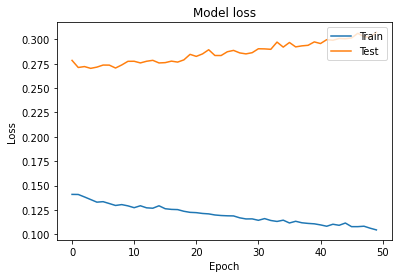

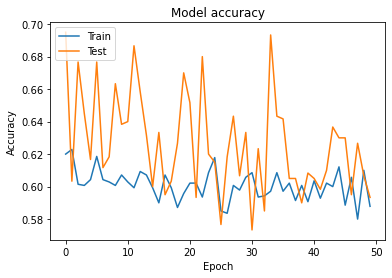

In [78]:
# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

# Plot train vs test accuracy during training
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])

### EarlyStopping ans ModelCheckpoint

In [82]:
# Import the early stopping callback
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Define a callback to monitor val_acc
monitor_val_acc = EarlyStopping(monitor='val_acc', 
                                patience=3)

# Save the best model as best_banknote_model.hdf5
modelCheckpoint = ModelCheckpoint('best_banknote_model.hdf5', save_best_only = True)

# Train your model using the early stopping callback
model.fit(sensors_train, parcels_train, epochs=1000, 
          validation_data=(sensors_test,parcels_test), 
          callbacks=[monitor_val_acc, modelCheckpoint])

Epoch 1/1000
44/44 [==============================] - 0s 4ms/step - loss: 2.5376e-04 - accuracy: 0.5743 - val_loss: 1.6135 - val_accuracy: 0.5900
Epoch 2/1000
44/44 [==============================] - 0s 3ms/step - loss: 2.7364e-04 - accuracy: 0.5793 - val_loss: 1.6122 - val_accuracy: 0.5917
Epoch 3/1000
44/44 [==============================] - 0s 3ms/step - loss: 2.4252e-04 - accuracy: 0.5793 - val_loss: 1.6141 - val_accuracy: 0.5833
Epoch 4/1000
44/44 [==============================] - 0s 3ms/step - loss: 2.3681e-04 - accuracy: 0.5679 - val_loss: 1.6185 - val_accuracy: 0.5917
Epoch 5/1000
44/44 [==============================] - 0s 3ms/step - loss: 2.3569e-04 - accuracy: 0.5821 - val_loss: 1.6198 - val_accuracy: 0.5883
Epoch 6/1000
44/44 [==============================] - 0s 3ms/step - loss: 2.4251e-04 - accuracy: 0.5807 - val_loss: 1.6188 - val_accuracy: 0.5850
Epoch 7/1000
44/44 [==============================] - 0s 3ms/step - loss: 2.4522e-04 - accuracy: 0.5743 - val_loss: 1.6210 -

44/44 [==============================] - 0s 3ms/step - loss: 3.2111e-04 - accuracy: 0.5750 - val_loss: 1.6413 - val_accuracy: 0.5867
Epoch 23/1000
44/44 [==============================] - 0s 3ms/step - loss: 2.4136e-04 - accuracy: 0.5764 - val_loss: 1.6468 - val_accuracy: 0.5867
Epoch 24/1000
44/44 [==============================] - 0s 3ms/step - loss: 2.3615e-04 - accuracy: 0.5786 - val_loss: 1.6504 - val_accuracy: 0.5850
Epoch 25/1000
44/44 [==============================] - 0s 3ms/step - loss: 2.2034e-04 - accuracy: 0.5829 - val_loss: 1.6514 - val_accuracy: 0.5867
Epoch 26/1000
44/44 [==============================] - 0s 3ms/step - loss: 2.3004e-04 - accuracy: 0.5800 - val_loss: 1.6543 - val_accuracy: 0.5900
Epoch 27/1000
44/44 [==============================] - 0s 3ms/step - loss: 2.2037e-04 - accuracy: 0.5757 - val_loss: 1.6580 - val_accuracy: 0.5967
Epoch 28/1000
44/44 [==============================] - 0s 3ms/step - loss: 2.1184e-04 - accuracy: 0.5793 - val_loss: 1.6553 - val_ac

44/44 [==============================] - 0s 2ms/step - loss: 2.0896e-04 - accuracy: 0.5729 - val_loss: 1.6786 - val_accuracy: 0.5917
Epoch 66/1000
44/44 [==============================] - 0s 2ms/step - loss: 2.0605e-04 - accuracy: 0.5743 - val_loss: 1.6800 - val_accuracy: 0.5917
Epoch 67/1000
44/44 [==============================] - 0s 3ms/step - loss: 2.0552e-04 - accuracy: 0.5729 - val_loss: 1.6805 - val_accuracy: 0.5917
Epoch 68/1000
44/44 [==============================] - 0s 2ms/step - loss: 2.0419e-04 - accuracy: 0.5729 - val_loss: 1.6804 - val_accuracy: 0.5917
Epoch 69/1000
44/44 [==============================] - 0s 2ms/step - loss: 2.0129e-04 - accuracy: 0.5736 - val_loss: 1.6809 - val_accuracy: 0.5917
Epoch 70/1000
44/44 [==============================] - 0s 3ms/step - loss: 2.0013e-04 - accuracy: 0.5714 - val_loss: 1.6815 - val_accuracy: 0.5933
Epoch 71/1000
44/44 [==============================] - 0s 3ms/step - loss: 1.9922e-04 - accuracy: 0.5729 - val_loss: 1.6812 - val_ac

44/44 [==============================] - 0s 3ms/step - loss: 1.6332e-04 - accuracy: 0.5707 - val_loss: 1.6952 - val_accuracy: 0.5933
Epoch 109/1000
44/44 [==============================] - 0s 4ms/step - loss: 1.6442e-04 - accuracy: 0.5736 - val_loss: 1.6940 - val_accuracy: 0.5900
Epoch 110/1000
44/44 [==============================] - 0s 4ms/step - loss: 1.6526e-04 - accuracy: 0.5750 - val_loss: 1.6928 - val_accuracy: 0.5917
Epoch 111/1000
44/44 [==============================] - 0s 3ms/step - loss: 1.6071e-04 - accuracy: 0.5736 - val_loss: 1.6935 - val_accuracy: 0.5917
Epoch 112/1000
44/44 [==============================] - 0s 3ms/step - loss: 1.6318e-04 - accuracy: 0.5714 - val_loss: 1.6949 - val_accuracy: 0.5900
Epoch 113/1000
44/44 [==============================] - 0s 4ms/step - loss: 1.6205e-04 - accuracy: 0.5764 - val_loss: 1.6930 - val_accuracy: 0.5917
Epoch 114/1000
44/44 [==============================] - 0s 4ms/step - loss: 1.6036e-04 - accuracy: 0.5721 - val_loss: 1.6964 - 

44/44 [==============================] - 0s 2ms/step - loss: 1.3956e-04 - accuracy: 0.5807 - val_loss: 1.7182 - val_accuracy: 0.5917
Epoch 152/1000
44/44 [==============================] - 0s 2ms/step - loss: 1.4226e-04 - accuracy: 0.5771 - val_loss: 1.7186 - val_accuracy: 0.5917
Epoch 153/1000
44/44 [==============================] - 0s 2ms/step - loss: 1.4313e-04 - accuracy: 0.5771 - val_loss: 1.7220 - val_accuracy: 0.5917
Epoch 154/1000
44/44 [==============================] - 0s 2ms/step - loss: 1.4241e-04 - accuracy: 0.5736 - val_loss: 1.7202 - val_accuracy: 0.5883
Epoch 155/1000
44/44 [==============================] - 0s 2ms/step - loss: 1.4157e-04 - accuracy: 0.5786 - val_loss: 1.7269 - val_accuracy: 0.5933
Epoch 156/1000
44/44 [==============================] - 0s 2ms/step - loss: 1.3979e-04 - accuracy: 0.5721 - val_loss: 1.7256 - val_accuracy: 0.5917
Epoch 157/1000
44/44 [==============================] - 0s 2ms/step - loss: 1.4148e-04 - accuracy: 0.5793 - val_loss: 1.7263 - 

44/44 [==============================] - 0s 2ms/step - loss: 2.1270e-04 - accuracy: 0.5814 - val_loss: 1.7485 - val_accuracy: 0.5950
Epoch 195/1000
44/44 [==============================] - 0s 2ms/step - loss: 2.0834e-04 - accuracy: 0.5807 - val_loss: 1.7489 - val_accuracy: 0.5950
Epoch 196/1000
44/44 [==============================] - 0s 2ms/step - loss: 2.0445e-04 - accuracy: 0.5857 - val_loss: 1.7498 - val_accuracy: 0.5967
Epoch 197/1000
44/44 [==============================] - 0s 2ms/step - loss: 1.9980e-04 - accuracy: 0.5829 - val_loss: 1.7505 - val_accuracy: 0.5967
Epoch 198/1000
44/44 [==============================] - 0s 2ms/step - loss: 1.9488e-04 - accuracy: 0.5829 - val_loss: 1.7509 - val_accuracy: 0.5967
Epoch 199/1000
44/44 [==============================] - 0s 2ms/step - loss: 1.9207e-04 - accuracy: 0.5850 - val_loss: 1.7522 - val_accuracy: 0.5967
Epoch 200/1000
44/44 [==============================] - 0s 2ms/step - loss: 1.8806e-04 - accuracy: 0.5836 - val_loss: 1.7525 - 

44/44 [==============================] - 0s 2ms/step - loss: 1.3205e-04 - accuracy: 0.5843 - val_loss: 1.7725 - val_accuracy: 0.5933
Epoch 238/1000
44/44 [==============================] - 0s 2ms/step - loss: 1.3077e-04 - accuracy: 0.5814 - val_loss: 1.7717 - val_accuracy: 0.5933
Epoch 239/1000
44/44 [==============================] - 0s 2ms/step - loss: 1.3041e-04 - accuracy: 0.5850 - val_loss: 1.7738 - val_accuracy: 0.5933
Epoch 240/1000
44/44 [==============================] - 0s 2ms/step - loss: 1.2935e-04 - accuracy: 0.5807 - val_loss: 1.7732 - val_accuracy: 0.5950
Epoch 241/1000
44/44 [==============================] - 0s 2ms/step - loss: 1.2900e-04 - accuracy: 0.5850 - val_loss: 1.7730 - val_accuracy: 0.5933
Epoch 242/1000
44/44 [==============================] - 0s 2ms/step - loss: 1.2967e-04 - accuracy: 0.5800 - val_loss: 1.7736 - val_accuracy: 0.5950
Epoch 243/1000
44/44 [==============================] - 0s 2ms/step - loss: 1.2703e-04 - accuracy: 0.5864 - val_loss: 1.7747 - 

44/44 [==============================] - 0s 3ms/step - loss: 1.0864e-04 - accuracy: 0.5821 - val_loss: 1.7863 - val_accuracy: 0.5950
Epoch 281/1000
44/44 [==============================] - 0s 2ms/step - loss: 1.0742e-04 - accuracy: 0.5793 - val_loss: 1.7881 - val_accuracy: 0.5967
Epoch 282/1000
44/44 [==============================] - 0s 2ms/step - loss: 1.0807e-04 - accuracy: 0.5821 - val_loss: 1.7912 - val_accuracy: 0.5983
Epoch 283/1000
44/44 [==============================] - 0s 2ms/step - loss: 1.0708e-04 - accuracy: 0.5807 - val_loss: 1.7886 - val_accuracy: 0.5950
Epoch 284/1000
44/44 [==============================] - 0s 4ms/step - loss: 1.0684e-04 - accuracy: 0.5843 - val_loss: 1.7872 - val_accuracy: 0.5917
Epoch 285/1000
44/44 [==============================] - 0s 2ms/step - loss: 1.0608e-04 - accuracy: 0.5779 - val_loss: 1.7890 - val_accuracy: 0.5917
Epoch 286/1000
44/44 [==============================] - 0s 4ms/step - loss: 1.0733e-04 - accuracy: 0.5836 - val_loss: 1.7896 - 

44/44 [==============================] - 0s 2ms/step - loss: 9.3794e-05 - accuracy: 0.5750 - val_loss: 1.8094 - val_accuracy: 0.6000
Epoch 324/1000
44/44 [==============================] - 0s 2ms/step - loss: 9.5822e-05 - accuracy: 0.5779 - val_loss: 1.8133 - val_accuracy: 0.6033
Epoch 325/1000
44/44 [==============================] - 0s 3ms/step - loss: 9.2967e-05 - accuracy: 0.5786 - val_loss: 1.8121 - val_accuracy: 0.5917
Epoch 326/1000
44/44 [==============================] - 0s 2ms/step - loss: 9.2858e-05 - accuracy: 0.5800 - val_loss: 1.8145 - val_accuracy: 0.5950
Epoch 327/1000
44/44 [==============================] - 0s 2ms/step - loss: 9.4394e-05 - accuracy: 0.5771 - val_loss: 1.8153 - val_accuracy: 0.5967
Epoch 328/1000
44/44 [==============================] - 0s 2ms/step - loss: 9.3372e-05 - accuracy: 0.5771 - val_loss: 1.8160 - val_accuracy: 0.5967
Epoch 329/1000
44/44 [==============================] - 0s 2ms/step - loss: 9.1554e-05 - accuracy: 0.5764 - val_loss: 1.8179 - 

Epoch 345/1000
44/44 [==============================] - 0s 3ms/step - loss: 8.8107e-05 - accuracy: 0.5743 - val_loss: 1.8376 - val_accuracy: 0.6000
Epoch 346/1000
44/44 [==============================] - 0s 2ms/step - loss: 9.6839e-05 - accuracy: 0.5821 - val_loss: 1.8361 - val_accuracy: 0.6017
Epoch 347/1000
44/44 [==============================] - 0s 3ms/step - loss: 9.6811e-05 - accuracy: 0.5814 - val_loss: 1.8362 - val_accuracy: 0.5917
Epoch 348/1000
44/44 [==============================] - 0s 2ms/step - loss: 8.7955e-05 - accuracy: 0.5779 - val_loss: 1.8379 - val_accuracy: 0.5933
Epoch 349/1000
44/44 [==============================] - 0s 3ms/step - loss: 9.1469e-05 - accuracy: 0.5814 - val_loss: 1.8365 - val_accuracy: 0.5967
Epoch 350/1000
44/44 [==============================] - 0s 3ms/step - loss: 9.4661e-05 - accuracy: 0.5779 - val_loss: 1.8373 - val_accuracy: 0.5900
Epoch 351/1000
44/44 [==============================] - 0s 3ms/step - loss: 9.1805e-05 - accuracy: 0.5779 - val_

44/44 [==============================] - 0s 5ms/step - loss: 8.5799e-05 - accuracy: 0.5779 - val_loss: 1.8589 - val_accuracy: 0.6083
Epoch 367/1000
44/44 [==============================] - 0s 5ms/step - loss: 8.2062e-05 - accuracy: 0.5786 - val_loss: 1.8654 - val_accuracy: 0.5983
Epoch 368/1000
44/44 [==============================] - 0s 4ms/step - loss: 8.5376e-05 - accuracy: 0.5814 - val_loss: 1.8608 - val_accuracy: 0.5900
Epoch 369/1000
44/44 [==============================] - 0s 2ms/step - loss: 8.9506e-05 - accuracy: 0.5771 - val_loss: 1.8662 - val_accuracy: 0.6083
Epoch 370/1000
44/44 [==============================] - 0s 3ms/step - loss: 9.1591e-05 - accuracy: 0.5800 - val_loss: 1.8745 - val_accuracy: 0.5950
Epoch 371/1000
44/44 [==============================] - 0s 3ms/step - loss: 7.9575e-05 - accuracy: 0.5721 - val_loss: 1.8683 - val_accuracy: 0.6033
Epoch 372/1000
44/44 [==============================] - 0s 3ms/step - loss: 8.3268e-05 - accuracy: 0.5771 - val_loss: 1.8698 - 

44/44 [==============================] - 0s 2ms/step - loss: 9.6255e-05 - accuracy: 0.5786 - val_loss: 1.9070 - val_accuracy: 0.5967
Epoch 410/1000
44/44 [==============================] - 0s 2ms/step - loss: 9.4992e-05 - accuracy: 0.5800 - val_loss: 1.9078 - val_accuracy: 0.5967
Epoch 411/1000
44/44 [==============================] - 0s 2ms/step - loss: 9.3797e-05 - accuracy: 0.5779 - val_loss: 1.9078 - val_accuracy: 0.5967
Epoch 412/1000
44/44 [==============================] - 0s 2ms/step - loss: 9.2489e-05 - accuracy: 0.5779 - val_loss: 1.9074 - val_accuracy: 0.5967
Epoch 413/1000
44/44 [==============================] - 0s 2ms/step - loss: 9.1579e-05 - accuracy: 0.5793 - val_loss: 1.9075 - val_accuracy: 0.5967
Epoch 414/1000
44/44 [==============================] - 0s 2ms/step - loss: 9.0607e-05 - accuracy: 0.5771 - val_loss: 1.9075 - val_accuracy: 0.5967
Epoch 415/1000
44/44 [==============================] - 0s 2ms/step - loss: 8.9596e-05 - accuracy: 0.5771 - val_loss: 1.9076 - 

44/44 [==============================] - 0s 3ms/step - loss: 6.7846e-05 - accuracy: 0.5786 - val_loss: 1.9132 - val_accuracy: 0.5983
Epoch 453/1000
44/44 [==============================] - 0s 5ms/step - loss: 6.7598e-05 - accuracy: 0.5757 - val_loss: 1.9138 - val_accuracy: 0.5983
Epoch 454/1000
44/44 [==============================] - 0s 4ms/step - loss: 6.7370e-05 - accuracy: 0.5764 - val_loss: 1.9136 - val_accuracy: 0.5983
Epoch 455/1000
44/44 [==============================] - 0s 4ms/step - loss: 6.7103e-05 - accuracy: 0.5771 - val_loss: 1.9150 - val_accuracy: 0.5983
Epoch 456/1000
44/44 [==============================] - 0s 2ms/step - loss: 6.6925e-05 - accuracy: 0.5764 - val_loss: 1.9145 - val_accuracy: 0.5983
Epoch 457/1000
44/44 [==============================] - 0s 2ms/step - loss: 6.6294e-05 - accuracy: 0.5750 - val_loss: 1.9153 - val_accuracy: 0.5983
Epoch 458/1000
44/44 [==============================] - 0s 3ms/step - loss: 6.5618e-05 - accuracy: 0.5757 - val_loss: 1.9153 - 

44/44 [==============================] - 0s 2ms/step - loss: 5.7170e-05 - accuracy: 0.5743 - val_loss: 1.9257 - val_accuracy: 0.5967
Epoch 496/1000
44/44 [==============================] - 0s 2ms/step - loss: 5.7024e-05 - accuracy: 0.5757 - val_loss: 1.9278 - val_accuracy: 0.5967
Epoch 497/1000
44/44 [==============================] - 0s 2ms/step - loss: 5.6123e-05 - accuracy: 0.5750 - val_loss: 1.9295 - val_accuracy: 0.5967
Epoch 498/1000
44/44 [==============================] - 0s 2ms/step - loss: 5.6147e-05 - accuracy: 0.5743 - val_loss: 1.9285 - val_accuracy: 0.5967
Epoch 499/1000
44/44 [==============================] - 0s 2ms/step - loss: 5.6394e-05 - accuracy: 0.5750 - val_loss: 1.9270 - val_accuracy: 0.5917
Epoch 500/1000
44/44 [==============================] - 0s 2ms/step - loss: 5.5754e-05 - accuracy: 0.5729 - val_loss: 1.9282 - val_accuracy: 0.5967
Epoch 501/1000
44/44 [==============================] - 0s 2ms/step - loss: 5.5267e-05 - accuracy: 0.5743 - val_loss: 1.9297 - 

44/44 [==============================] - 0s 2ms/step - loss: 4.9523e-05 - accuracy: 0.5714 - val_loss: 1.9506 - val_accuracy: 0.5900
Epoch 539/1000
44/44 [==============================] - 0s 2ms/step - loss: 4.9035e-05 - accuracy: 0.5786 - val_loss: 1.9528 - val_accuracy: 0.5900
Epoch 540/1000
44/44 [==============================] - 0s 2ms/step - loss: 5.0871e-05 - accuracy: 0.5736 - val_loss: 1.9547 - val_accuracy: 0.6000
Epoch 541/1000
44/44 [==============================] - 0s 2ms/step - loss: 4.9042e-05 - accuracy: 0.5771 - val_loss: 1.9531 - val_accuracy: 0.5967
Epoch 542/1000
44/44 [==============================] - 0s 2ms/step - loss: 4.9068e-05 - accuracy: 0.5721 - val_loss: 1.9546 - val_accuracy: 0.5950
Epoch 543/1000
44/44 [==============================] - 0s 2ms/step - loss: 4.8782e-05 - accuracy: 0.5764 - val_loss: 1.9531 - val_accuracy: 0.5967
Epoch 544/1000
44/44 [==============================] - 0s 2ms/step - loss: 4.7955e-05 - accuracy: 0.5757 - val_loss: 1.9566 - 

44/44 [==============================] - 0s 2ms/step - loss: 4.2035e-05 - accuracy: 0.5729 - val_loss: 1.9944 - val_accuracy: 0.5950
Epoch 582/1000
44/44 [==============================] - 0s 2ms/step - loss: 4.2365e-05 - accuracy: 0.5800 - val_loss: 1.9971 - val_accuracy: 0.5950
Epoch 583/1000
44/44 [==============================] - 0s 2ms/step - loss: 4.9530e-05 - accuracy: 0.5764 - val_loss: 2.0068 - val_accuracy: 0.5933
Epoch 584/1000
44/44 [==============================] - 0s 2ms/step - loss: 4.6733e-05 - accuracy: 0.5814 - val_loss: 2.0050 - val_accuracy: 0.5900
Epoch 585/1000
44/44 [==============================] - 0s 2ms/step - loss: 4.3792e-05 - accuracy: 0.5736 - val_loss: 2.0056 - val_accuracy: 0.5967
Epoch 586/1000
44/44 [==============================] - 0s 2ms/step - loss: 4.2122e-05 - accuracy: 0.5750 - val_loss: 2.0051 - val_accuracy: 0.6017
Epoch 587/1000
44/44 [==============================] - 0s 2ms/step - loss: 4.2028e-05 - accuracy: 0.5750 - val_loss: 2.0169 - 

44/44 [==============================] - 0s 4ms/step - loss: 3.2051e-05 - accuracy: 0.5771 - val_loss: 2.0778 - val_accuracy: 0.6083
Epoch 625/1000
44/44 [==============================] - 0s 3ms/step - loss: 3.1422e-05 - accuracy: 0.5707 - val_loss: 2.0823 - val_accuracy: 0.5883
Epoch 626/1000
44/44 [==============================] - 0s 4ms/step - loss: 3.2424e-05 - accuracy: 0.5779 - val_loss: 2.0767 - val_accuracy: 0.5917
Epoch 627/1000
44/44 [==============================] - 0s 2ms/step - loss: 2.9191e-05 - accuracy: 0.5764 - val_loss: 2.0752 - val_accuracy: 0.5950
Epoch 628/1000
44/44 [==============================] - 0s 5ms/step - loss: 3.3768e-05 - accuracy: 0.5771 - val_loss: 2.0745 - val_accuracy: 0.6050
Epoch 629/1000
44/44 [==============================] - 0s 3ms/step - loss: 3.3440e-05 - accuracy: 0.5829 - val_loss: 2.0803 - val_accuracy: 0.5917
Epoch 630/1000
44/44 [==============================] - 0s 2ms/step - loss: 3.1923e-05 - accuracy: 0.5786 - val_loss: 2.0850 - 

Epoch 646/1000
44/44 [==============================] - 0s 3ms/step - loss: 1.0172e-04 - accuracy: 0.5757 - val_loss: 2.0595 - val_accuracy: 0.5917
Epoch 647/1000
44/44 [==============================] - 0s 3ms/step - loss: 9.5112e-05 - accuracy: 0.5757 - val_loss: 2.0620 - val_accuracy: 0.5900
Epoch 648/1000
44/44 [==============================] - 0s 3ms/step - loss: 8.9889e-05 - accuracy: 0.5786 - val_loss: 2.0632 - val_accuracy: 0.5917
Epoch 649/1000
44/44 [==============================] - 0s 3ms/step - loss: 8.5468e-05 - accuracy: 0.5750 - val_loss: 2.0648 - val_accuracy: 0.5917
Epoch 650/1000
44/44 [==============================] - 0s 3ms/step - loss: 8.2245e-05 - accuracy: 0.5779 - val_loss: 2.0663 - val_accuracy: 0.5967
Epoch 651/1000
44/44 [==============================] - 0s 3ms/step - loss: 7.8480e-05 - accuracy: 0.5743 - val_loss: 2.0674 - val_accuracy: 0.5917
Epoch 652/1000
44/44 [==============================] - 0s 3ms/step - loss: 7.5849e-05 - accuracy: 0.5743 - val_

44/44 [==============================] - 0s 3ms/step - loss: 5.4174e-05 - accuracy: 0.5729 - val_loss: 2.0826 - val_accuracy: 0.5950
Epoch 668/1000
44/44 [==============================] - 0s 3ms/step - loss: 5.3193e-05 - accuracy: 0.5721 - val_loss: 2.0833 - val_accuracy: 0.5900
Epoch 669/1000
44/44 [==============================] - 0s 3ms/step - loss: 5.2410e-05 - accuracy: 0.5721 - val_loss: 2.0843 - val_accuracy: 0.5900
Epoch 670/1000
44/44 [==============================] - 0s 3ms/step - loss: 5.1661e-05 - accuracy: 0.5729 - val_loss: 2.0847 - val_accuracy: 0.5900
Epoch 671/1000
44/44 [==============================] - 0s 3ms/step - loss: 5.1006e-05 - accuracy: 0.5721 - val_loss: 2.0852 - val_accuracy: 0.5900
Epoch 672/1000
44/44 [==============================] - 0s 3ms/step - loss: 5.0222e-05 - accuracy: 0.5721 - val_loss: 2.0860 - val_accuracy: 0.5900
Epoch 673/1000
44/44 [==============================] - 0s 3ms/step - loss: 4.9604e-05 - accuracy: 0.5721 - val_loss: 2.0864 - 

44/44 [==============================] - 0s 3ms/step - loss: 3.4864e-05 - accuracy: 0.5707 - val_loss: 2.1012 - val_accuracy: 0.5950
Epoch 711/1000
44/44 [==============================] - 0s 3ms/step - loss: 3.4533e-05 - accuracy: 0.5714 - val_loss: 2.1018 - val_accuracy: 0.5950
Epoch 712/1000
44/44 [==============================] - 0s 3ms/step - loss: 3.4379e-05 - accuracy: 0.5714 - val_loss: 2.1016 - val_accuracy: 0.5950
Epoch 713/1000
44/44 [==============================] - 0s 3ms/step - loss: 3.4118e-05 - accuracy: 0.5714 - val_loss: 2.1020 - val_accuracy: 0.5950
Epoch 714/1000
44/44 [==============================] - 0s 5ms/step - loss: 3.3833e-05 - accuracy: 0.5714 - val_loss: 2.1023 - val_accuracy: 0.5950
Epoch 715/1000
44/44 [==============================] - 0s 3ms/step - loss: 3.3650e-05 - accuracy: 0.5707 - val_loss: 2.1024 - val_accuracy: 0.5933
Epoch 716/1000
44/44 [==============================] - 0s 3ms/step - loss: 3.3589e-05 - accuracy: 0.5707 - val_loss: 2.1031 - 

44/44 [==============================] - 0s 3ms/step - loss: 2.6738e-05 - accuracy: 0.5729 - val_loss: 2.1112 - val_accuracy: 0.5933
Epoch 754/1000
44/44 [==============================] - 0s 3ms/step - loss: 2.6622e-05 - accuracy: 0.5721 - val_loss: 2.1115 - val_accuracy: 0.5933
Epoch 755/1000
44/44 [==============================] - 0s 3ms/step - loss: 2.6509e-05 - accuracy: 0.5714 - val_loss: 2.1119 - val_accuracy: 0.5933
Epoch 756/1000
44/44 [==============================] - 0s 3ms/step - loss: 2.6467e-05 - accuracy: 0.5707 - val_loss: 2.1118 - val_accuracy: 0.5933
Epoch 757/1000
44/44 [==============================] - 0s 3ms/step - loss: 2.6368e-05 - accuracy: 0.5721 - val_loss: 2.1126 - val_accuracy: 0.5933
Epoch 758/1000
44/44 [==============================] - 0s 3ms/step - loss: 2.6192e-05 - accuracy: 0.5721 - val_loss: 2.1115 - val_accuracy: 0.5933
Epoch 759/1000
44/44 [==============================] - 0s 3ms/step - loss: 2.6122e-05 - accuracy: 0.5743 - val_loss: 2.1114 - 

44/44 [==============================] - 0s 3ms/step - loss: 2.2144e-05 - accuracy: 0.5714 - val_loss: 2.1214 - val_accuracy: 0.5933
Epoch 797/1000
44/44 [==============================] - 0s 3ms/step - loss: 2.1529e-05 - accuracy: 0.5729 - val_loss: 2.1229 - val_accuracy: 0.5950
Epoch 798/1000
44/44 [==============================] - 0s 2ms/step - loss: 2.1583e-05 - accuracy: 0.5750 - val_loss: 2.1218 - val_accuracy: 0.5900
Epoch 799/1000
44/44 [==============================] - 0s 3ms/step - loss: 2.1504e-05 - accuracy: 0.5721 - val_loss: 2.1237 - val_accuracy: 0.5950
Epoch 800/1000
44/44 [==============================] - 0s 3ms/step - loss: 2.1573e-05 - accuracy: 0.5743 - val_loss: 2.1247 - val_accuracy: 0.5950
Epoch 801/1000
44/44 [==============================] - 0s 3ms/step - loss: 2.1174e-05 - accuracy: 0.5721 - val_loss: 2.1249 - val_accuracy: 0.5950
Epoch 802/1000
44/44 [==============================] - 0s 4ms/step - loss: 2.1245e-05 - accuracy: 0.5721 - val_loss: 2.1237 - 

44/44 [==============================] - 0s 3ms/step - loss: 1.8747e-05 - accuracy: 0.5729 - val_loss: 2.1443 - val_accuracy: 0.5950
Epoch 840/1000
44/44 [==============================] - 0s 3ms/step - loss: 1.8708e-05 - accuracy: 0.5757 - val_loss: 2.1430 - val_accuracy: 0.5983
Epoch 841/1000
44/44 [==============================] - 0s 5ms/step - loss: 1.9218e-05 - accuracy: 0.5721 - val_loss: 2.1498 - val_accuracy: 0.5983
Epoch 842/1000
44/44 [==============================] - 0s 3ms/step - loss: 1.8963e-05 - accuracy: 0.5771 - val_loss: 2.1469 - val_accuracy: 0.5967
Epoch 843/1000
44/44 [==============================] - 0s 3ms/step - loss: 1.8434e-05 - accuracy: 0.5707 - val_loss: 2.1467 - val_accuracy: 0.5950
Epoch 844/1000
44/44 [==============================] - 0s 2ms/step - loss: 1.8191e-05 - accuracy: 0.5729 - val_loss: 2.1475 - val_accuracy: 0.5883
Epoch 845/1000
44/44 [==============================] - 0s 3ms/step - loss: 1.8328e-05 - accuracy: 0.5693 - val_loss: 2.1476 - 

44/44 [==============================] - 0s 3ms/step - loss: 2.5833e-05 - accuracy: 0.5829 - val_loss: 2.1949 - val_accuracy: 0.6000
Epoch 883/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 0.5743 - val_loss: 2.2052 - val_accuracy: 0.6133
Epoch 884/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0288 - accuracy: 0.5857 - val_loss: 2.2301 - val_accuracy: 0.5667
Epoch 885/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0149 - accuracy: 0.5786 - val_loss: 2.1736 - val_accuracy: 0.6450
Epoch 886/1000
44/44 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 0.6150 - val_loss: 2.1852 - val_accuracy: 0.5850
Epoch 887/1000
44/44 [==============================] - 0s 3ms/step - loss: 5.0816e-04 - accuracy: 0.5679 - val_loss: 2.1621 - val_accuracy: 0.6000
Epoch 888/1000
44/44 [==============================] - 0s 3ms/step - loss: 1.3951e-04 - accuracy: 0.5743 - val_loss: 2.1629 - val_accuracy: 0.

Epoch 904/1000
44/44 [==============================] - 0s 3ms/step - loss: 4.5151e-05 - accuracy: 0.5757 - val_loss: 2.1724 - val_accuracy: 0.6000
Epoch 905/1000
44/44 [==============================] - 0s 4ms/step - loss: 4.4130e-05 - accuracy: 0.5771 - val_loss: 2.1726 - val_accuracy: 0.6000
Epoch 906/1000
44/44 [==============================] - 0s 5ms/step - loss: 4.3281e-05 - accuracy: 0.5764 - val_loss: 2.1729 - val_accuracy: 0.6000
Epoch 907/1000
44/44 [==============================] - 0s 5ms/step - loss: 4.2383e-05 - accuracy: 0.5771 - val_loss: 2.1732 - val_accuracy: 0.6000
Epoch 908/1000
44/44 [==============================] - 0s 4ms/step - loss: 4.1562e-05 - accuracy: 0.5771 - val_loss: 2.1736 - val_accuracy: 0.6000
Epoch 909/1000
44/44 [==============================] - 0s 3ms/step - loss: 4.0743e-05 - accuracy: 0.5771 - val_loss: 2.1739 - val_accuracy: 0.6000
Epoch 910/1000
44/44 [==============================] - 0s 3ms/step - loss: 4.0157e-05 - accuracy: 0.5771 - val_

44/44 [==============================] - 0s 3ms/step - loss: 3.2474e-05 - accuracy: 0.5771 - val_loss: 2.1770 - val_accuracy: 0.6000
Epoch 926/1000
44/44 [==============================] - 0s 3ms/step - loss: 3.2038e-05 - accuracy: 0.5771 - val_loss: 2.1773 - val_accuracy: 0.6000
Epoch 927/1000
44/44 [==============================] - 0s 3ms/step - loss: 3.1696e-05 - accuracy: 0.5779 - val_loss: 2.1776 - val_accuracy: 0.6033
Epoch 928/1000
44/44 [==============================] - 0s 3ms/step - loss: 3.1373e-05 - accuracy: 0.5779 - val_loss: 2.1777 - val_accuracy: 0.6000
Epoch 929/1000
44/44 [==============================] - 0s 3ms/step - loss: 3.1062e-05 - accuracy: 0.5779 - val_loss: 2.1779 - val_accuracy: 0.6000
Epoch 930/1000
44/44 [==============================] - 0s 3ms/step - loss: 3.0719e-05 - accuracy: 0.5779 - val_loss: 2.1783 - val_accuracy: 0.6033
Epoch 931/1000
44/44 [==============================] - 0s 3ms/step - loss: 3.0360e-05 - accuracy: 0.5786 - val_loss: 2.1782 - 

44/44 [==============================] - 0s 3ms/step - loss: 2.2251e-05 - accuracy: 0.5771 - val_loss: 2.1852 - val_accuracy: 0.5983
Epoch 969/1000
44/44 [==============================] - 0s 3ms/step - loss: 2.2062e-05 - accuracy: 0.5779 - val_loss: 2.1855 - val_accuracy: 0.5983
Epoch 970/1000
44/44 [==============================] - 0s 3ms/step - loss: 2.1926e-05 - accuracy: 0.5779 - val_loss: 2.1856 - val_accuracy: 0.5983
Epoch 971/1000
44/44 [==============================] - 0s 2ms/step - loss: 2.1748e-05 - accuracy: 0.5779 - val_loss: 2.1858 - val_accuracy: 0.5983
Epoch 972/1000
44/44 [==============================] - 0s 3ms/step - loss: 2.1653e-05 - accuracy: 0.5771 - val_loss: 2.1862 - val_accuracy: 0.5983
Epoch 973/1000
44/44 [==============================] - 0s 2ms/step - loss: 2.1442e-05 - accuracy: 0.5779 - val_loss: 2.1862 - val_accuracy: 0.5983
Epoch 974/1000
44/44 [==============================] - 0s 2ms/step - loss: 2.1344e-05 - accuracy: 0.5771 - val_loss: 2.1863 - 

## 5) Improving Your Model

In [5]:
X = np.load('Datasets/Digits/digits_pixels.npy')
print(X[0:1])
print(X.shape)
y = np.load('Datasets/Digits/digits_target.npy')
print(y[0:1])
print(y.shape)

[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]]
(1797, 64)
[0]
(1797,)


In [6]:
from keras.utils import to_categorical

y = to_categorical(y)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
from keras.layers import Dense
from keras.models import Sequential

# Instantiate a Sequential model
model = Sequential()

# Input and hidden layer with input_shape, 16 neurons, and relu 
model.add(Dense(16, input_shape = (64,), activation = 'relu'))

# Output layer with 10 neurons (one per digit) and softmax
model.add(Dense(10, activation = 'softmax'))

# Compile your model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Test if your model is well assembled by predicting before training
print(model.predict(X_train))

[[5.7374425e-11 9.0435600e-01 5.1525100e-09 ... 9.5635466e-02
  3.7020456e-12 1.5089659e-12]
 [1.2696785e-02 4.6598345e-01 8.0657298e-10 ... 1.6579269e-01
  2.4248016e-04 1.0116278e-03]
 [2.5566151e-06 4.5429251e-01 2.1418007e-06 ... 5.4561341e-01
  1.4294775e-08 5.7576198e-08]
 ...
 [2.1935332e-08 9.9969769e-01 4.7415483e-10 ... 1.8289157e-04
  3.4646022e-05 2.1844771e-08]
 [8.0708263e-04 1.0090925e-02 1.7753436e-10 ... 1.4777569e-04
  3.3234804e-07 6.7495685e-06]
 [1.1859505e-08 9.3938190e-01 6.1206677e-08 ... 6.0591362e-02
  3.3799699e-10 4.0508458e-10]]


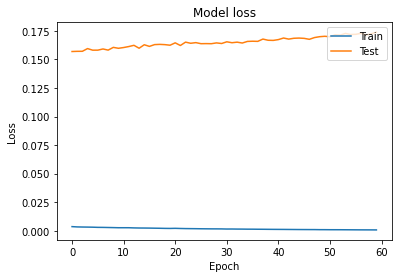

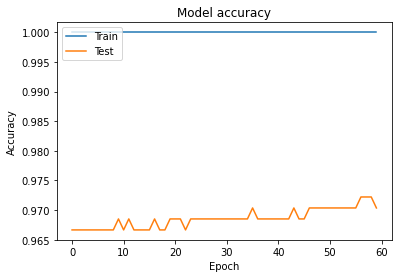

In [18]:
# Train your model for 60 epochs, using X_test and y_test as validation data
h_callback = model.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test), verbose=0)

# Extract from the h_callback object loss and val_loss to plot the learning curve
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

# Plot train vs test accuracy during training
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])